# Progress Report 3



In [1]:
import pandas as pd
import re
import pickle
import nltk
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud

In [2]:
# Formatting
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%pprint

Pretty printing has been turned OFF


In [3]:
f = open(r'D:\Documents\Classes\Spring2020\ling1340\Twitter-Positivity-Analysis\data\trainingandtestdata\training.1600000.processed.noemoticon.csv', 'r+')
classify = pd.read_csv(f, index_col=False, names=["polarity", "tweet_id", "date", "query", "username", "text"] ,error_bad_lines=False)

In [4]:
classify['polarity'].value_counts()

4    800000
0    800000
Name: polarity, dtype: int64

In [5]:
classify = classify.replace(0, "neg")
classify = classify.replace(4, "pos")
classify.tail(5)

,polarity,tweet_id,date,query,username,text
1599995,pos,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,pos,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,pos,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,pos,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,pos,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
f = open('tweets2011.pkl', 'rb')      
tweets2011 = pickle.load(f) 
f.close()
f = open('tweets2019.pkl', 'rb')      
tweets2019 = pickle.load(f) 
f.close() 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
polarity = classify['polarity']
text = classify['text']
polaritytr, polarityts, texttr, textts = train_test_split(polarity, text, test_size = 0.4, random_state = 0)
nbmodel = make_pipeline(TfidfVectorizer(stop_words="english"), MultinomialNB()) 
nbmodel.fit(texttr, polaritytr)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [9]:
modelpredict = nbmodel.predict(textts)

In [10]:
accuracy_score(polarityts, modelpredict)

0.7605375

In [11]:
from langdetect import detect

In [12]:
i = 0
lng11 = pd.DataFrame()
while True: 
    try:
        tweets2011.loc[i, "text"] = re.sub(r'(?:(@|&|;|http|https)[\w_]+)', '', tweets2011.loc[i, "text"]) #cleaning
        tmp = pd.DataFrame({'languages': [detect(tweets2011.loc[i, "text"])]}) 
        lng11 = lng11.append(tmp, sort=False, ignore_index=True)
        if i > len(tweets2011):
            break
        i = i+1
    except:
        tmp = pd.DataFrame({'languages': ["error"]}) #If the language is not able to be predicted
        lng11 = lng11.append(tmp, sort=False, ignore_index=True)
        if i > len(tweets2011):
            break
        i = i+1

In [13]:
# This is the same as above, but for 2019
i = 0
lng19 = pd.DataFrame()
while True: 
    try:
        tweets2019.loc[i, "text"] = re.sub(r'(?:@[\w_]+)', '', tweets2019.loc[i, "text"])
        tmp = pd.DataFrame({'languages': [detect(tweets2019.loc[i, "text"])]})
        lng19 = lng19.append(tmp, sort=False, ignore_index=True)
        if i > len(tweets2019):
            break
        i = i+1
    except:
        tmp = pd.DataFrame({'languages': ["error"]})
        lng19 = lng19.append(tmp, sort=False, ignore_index=True)
        if i > len(tweets2019):
            break
        i = i+1


In [14]:
tweets2011['languages'] = lng11
#tweets2011 = tweets2011.drop(columns=['user.lang'])
tweets2019['languages'] = lng19
#tweets2019 = tweets2019.drop(columns=['user.lang'])

In [15]:
tweets2011 = tweets2011[tweets2011['languages'] == 'en']
len(tweets2011[tweets2011['languages'] == 'en'])
tweets2011.reset_index()

tweets2019 = tweets2019[tweets2019['languages'] == 'en']
len(tweets2019[tweets2019['languages'] == 'en'])
tweets2019.reset_index()

5370

,index,text,user.lang,created_at,languages
0,5,: YES:) are you busy thursday or friday? Lol ...,en,Wed Sep 28 03:01:00 +0000 2011,en
1,7,I'm your friend. (^___^) RT I got absolutely 0...,en,Wed Sep 28 03:01:00 +0000 2011,en
2,8,So.many.things.happening........ #omg #hurryhu...,en,Wed Sep 28 03:01:00 +0000 2011,en
3,11,Okay time for me too go too sleep.,en,Wed Sep 28 03:01:00 +0000 2011,en
4,16,"lol nun bad,, it's pose ta b tharr it was fer...",en,Wed Sep 28 03:01:00 +0000 2011,en
...,...,...,...,...,...
5365,13256,LAWLS. that's actually really funny.,en,Wed Sep 28 03:07:59 +0000 2011,en
5366,13266,RT: Read this and sigh/weep/giggle/sigh again....,en,Wed Sep 28 03:07:59 +0000 2011,en
5367,13270,Can it be October already!,en,Wed Sep 28 03:07:59 +0000 2011,en
5368,13271,"it was this phrase ""one of our exciting Macwo...",en,Wed Sep 28 03:07:59 +0000 2011,en


2371

,index,text,user.lang,created_at,languages
0,15,"ANGKUT AKU YA, INI FAVORITKU",id,Wed May 01 06:31:00 +0000 2019,en
1,16,RT: What's your All Time Most Favourite THALA ...,en,Wed May 01 06:31:00 +0000 2019,en
2,22,RT: Your hatred for PM Modi so deep rooted tha...,en,Wed May 01 06:31:00 +0000 2019,en
3,23,RT: “i remember how jungkook cried\nwhen i dec...,en,Wed May 01 06:31:00 +0000 2019,en
4,25,my number is from Gujarat and I am receiving ...,en,Wed May 01 06:31:00 +0000 2019,en
...,...,...,...,...,...
2366,9292,RT: let me hear a round of applause for scarle...,en,Wed May 01 06:29:59 +0000 2019,en
2367,9300,"RT: Hi, Friends! \n1. Watch this legendary per...",en,Wed May 01 06:29:59 +0000 2019,en
2368,9301,🔥+🦊=🙌🏾 https://t.co/vvRwCRPINt\nFirefox = Free...,ru,Wed May 01 06:29:59 +0000 2019,en
2369,9303,RT: Pearl Moon Dream Catcher Necklace with Wir...,en,Wed May 01 06:29:59 +0000 2019,en


In [16]:
tmp11 = []
for t in tweets2011.text:
    tmp11.append(nbmodel.predict([t]))
    i = i+1

In [17]:
tmp19 = []
for p in tweets2019.text:
    tmp19.append(nbmodel.predict([p]))
    i = i+1
    

In [18]:
tweets2011["polarity"] = tmp11
tweets2011.reindex()
tweets2019["polarity"] = tmp19
tweets2019.reindex()

,text,user.lang,created_at,languages,polarity
5,: YES:) are you busy thursday or friday? Lol ...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos]
7,I'm your friend. (^___^) RT I got absolutely 0...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos]
8,So.many.things.happening........ #omg #hurryhu...,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg]
11,Okay time for me too go too sleep.,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg]
16,"lol nun bad,, it's pose ta b tharr it was fer...",en,Wed Sep 28 03:01:00 +0000 2011,en,[pos]
...,...,...,...,...,...
13256,LAWLS. that's actually really funny.,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos]
13266,RT: Read this and sigh/weep/giggle/sigh again....,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos]
13270,Can it be October already!,en,Wed Sep 28 03:07:59 +0000 2011,en,[neg]
13271,"it was this phrase ""one of our exciting Macwo...",en,Wed Sep 28 03:07:59 +0000 2011,en,[pos]


,text,user.lang,created_at,languages,polarity
15,"ANGKUT AKU YA, INI FAVORITKU",id,Wed May 01 06:31:00 +0000 2019,en,[neg]
16,RT: What's your All Time Most Favourite THALA ...,en,Wed May 01 06:31:00 +0000 2019,en,[pos]
22,RT: Your hatred for PM Modi so deep rooted tha...,en,Wed May 01 06:31:00 +0000 2019,en,[pos]
23,RT: “i remember how jungkook cried\nwhen i dec...,en,Wed May 01 06:31:00 +0000 2019,en,[neg]
25,my number is from Gujarat and I am receiving ...,en,Wed May 01 06:31:00 +0000 2019,en,[pos]
...,...,...,...,...,...
9292,RT: let me hear a round of applause for scarle...,en,Wed May 01 06:29:59 +0000 2019,en,[pos]
9300,"RT: Hi, Friends! \n1. Watch this legendary per...",en,Wed May 01 06:29:59 +0000 2019,en,[pos]
9301,🔥+🦊=🙌🏾 https://t.co/vvRwCRPINt\nFirefox = Free...,ru,Wed May 01 06:29:59 +0000 2019,en,[pos]
9303,RT: Pearl Moon Dream Catcher Necklace with Wir...,en,Wed May 01 06:29:59 +0000 2019,en,[pos]


In [19]:
tweets2011['polarity'].value_counts()
tweets2019['polarity'].value_counts()

[pos]    2836
[neg]    2533
[pos]       1
Name: polarity, dtype: int64

[pos]    1668
[neg]     702
[neg]       1
Name: polarity, dtype: int64

In [20]:
tweets2011.text = tweets2011.text.str.lower()
tweets2019.text = tweets2019.text.str.lower()

In [21]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
tokens11 = tweets2011.text.map(nltk.word_tokenize)
tokens19 = tweets2019.text.map(nltk.word_tokenize)
tweets2011['tokens'] = tokens11
tweets2019['tokens'] = tokens19
toks11 = tweets2011['tokens'].apply(lambda x: [item for item in x if item not in stopwords])
toks19 = tweets2019['tokens'].apply(lambda x: [item for item in x if item not in stopwords])
tweets2011['tokens'] = toks11
tweets2019['tokens'] = toks19
tweets2011
tweets2019

,text,user.lang,created_at,languages,polarity,tokens
5,: yes:) are you busy thursday or friday? lol ...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[:, yes, :, ), busy, thursday, friday, ?, lol,..."
7,i'm your friend. (^___^) rt i got absolutely 0...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"['m, friend, ., (, ^___^, ), rt, got, absolute..."
8,so.many.things.happening........ #omg #hurryhu...,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[so.many.things.happening, ..., ..., .., #, om..."
11,okay time for me too go too sleep.,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[okay, time, go, sleep, .]"
16,"lol nun bad,, it's pose ta b tharr it was fer...",en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[lol, nun, bad, ,, ,, 's, pose, ta, b, tharr, ..."
...,...,...,...,...,...,...
13256,lawls. that's actually really funny.,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[lawls, ., 's, actually, really, funny, .]"
13266,rt: read this and sigh/weep/giggle/sigh again....,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[rt, :, read, sigh/weep/giggle/sigh, ., http, ..."
13270,can it be october already!,en,Wed Sep 28 03:07:59 +0000 2011,en,[neg],"[october, already, !]"
13271,"it was this phrase ""one of our exciting macwo...",en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[phrase, ``, one, exciting, macworld, writer, ..."


,text,user.lang,created_at,languages,polarity,tokens
15,"angkut aku ya, ini favoritku",id,Wed May 01 06:31:00 +0000 2019,en,[neg],"[angkut, aku, ya, ,, ini, favoritku]"
16,rt: what's your all time most favourite thala ...,en,Wed May 01 06:31:00 +0000 2019,en,[pos],"[rt, :, 's, time, favourite, thala, ajith, mov..."
22,rt: your hatred for pm modi so deep rooted tha...,en,Wed May 01 06:31:00 +0000 2019,en,[pos],"[rt, :, hatred, pm, modi, deep, rooted, actual..."
23,rt: “i remember how jungkook cried\nwhen i dec...,en,Wed May 01 06:31:00 +0000 2019,en,[neg],"[rt, :, “, remember, jungkook, cried, decided,..."
25,my number is from gujarat and i am receiving ...,en,Wed May 01 06:31:00 +0000 2019,en,[pos],"[number, gujarat, receiving, sms, outgoing, ca..."
...,...,...,...,...,...,...
9292,rt: let me hear a round of applause for scarle...,en,Wed May 01 06:29:59 +0000 2019,en,[pos],"[rt, :, let, hear, round, applause, scarlet, w..."
9300,"rt: hi, friends! \n1. watch this legendary per...",en,Wed May 01 06:29:59 +0000 2019,en,[pos],"[rt, :, hi, ,, friends, !, 1., watch, legendar..."
9301,🔥+🦊=🙌🏾 https://t.co/vvrwcrpint\nfirefox = free...,ru,Wed May 01 06:29:59 +0000 2019,en,[pos],"[🔥+🦊=🙌🏾, https, :, //t.co/vvrwcrpint, firefox,..."
9303,rt: pearl moon dream catcher necklace with wir...,en,Wed May 01 06:29:59 +0000 2019,en,[pos],"[rt, :, pearl, moon, dream, catcher, necklace,..."


In [22]:
tmp11 = []
for t in tweets2011.tokens:
    tmp11.append(nbmodel.predict([(" ").join(t)]))
    
tweets2011["polarity"] = tmp11

tmp19 = []
for t in tweets2019.tokens:
    tmp19.append(nbmodel.predict([(" ").join(t)]))
    
tweets2019["polarity"] = tmp19

In [23]:
tweets2011

,text,user.lang,created_at,languages,polarity,tokens
5,: yes:) are you busy thursday or friday? lol ...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[:, yes, :, ), busy, thursday, friday, ?, lol,..."
7,i'm your friend. (^___^) rt i got absolutely 0...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"['m, friend, ., (, ^___^, ), rt, got, absolute..."
8,so.many.things.happening........ #omg #hurryhu...,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[so.many.things.happening, ..., ..., .., #, om..."
11,okay time for me too go too sleep.,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[okay, time, go, sleep, .]"
16,"lol nun bad,, it's pose ta b tharr it was fer...",en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[lol, nun, bad, ,, ,, 's, pose, ta, b, tharr, ..."
...,...,...,...,...,...,...
13256,lawls. that's actually really funny.,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[lawls, ., 's, actually, really, funny, .]"
13266,rt: read this and sigh/weep/giggle/sigh again....,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[rt, :, read, sigh/weep/giggle/sigh, ., http, ..."
13270,can it be october already!,en,Wed Sep 28 03:07:59 +0000 2011,en,[neg],"[october, already, !]"
13271,"it was this phrase ""one of our exciting macwo...",en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[phrase, ``, one, exciting, macworld, writer, ..."


In [24]:
tweets2011['polarity'].value_counts()

[pos]    2920
[neg]    2449
[pos]       1
Name: polarity, dtype: int64

In [25]:
from string import punctuation
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
tokens = tweets2011.text.map(nltk.word_tokenize)
tweets2011['tokens'] = tokens
toks = tweets2011['tokens'].apply(lambda x: [item for item in x if item not in stopwords])
tweets2011['tokens'] = toks
tweets2011

,text,user.lang,created_at,languages,polarity,tokens
5,: yes:) are you busy thursday or friday? lol ...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[:, yes, :, ), busy, thursday, friday, ?, lol,..."
7,i'm your friend. (^___^) rt i got absolutely 0...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"['m, friend, ., (, ^___^, ), rt, got, absolute..."
8,so.many.things.happening........ #omg #hurryhu...,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[so.many.things.happening, ..., ..., .., #, om..."
11,okay time for me too go too sleep.,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[okay, time, go, sleep, .]"
16,"lol nun bad,, it's pose ta b tharr it was fer...",en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[lol, nun, bad, ,, ,, 's, pose, ta, b, tharr, ..."
...,...,...,...,...,...,...
13256,lawls. that's actually really funny.,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[lawls, ., 's, actually, really, funny, .]"
13266,rt: read this and sigh/weep/giggle/sigh again....,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[rt, :, read, sigh/weep/giggle/sigh, ., http, ..."
13270,can it be october already!,en,Wed Sep 28 03:07:59 +0000 2011,en,[neg],"[october, already, !]"
13271,"it was this phrase ""one of our exciting macwo...",en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[phrase, ``, one, exciting, macworld, writer, ..."


In [26]:
nopunc = []
tmp = []
for t in tweets2011.tokens:
    nopunc = ' '.join([c for c in t if c not in punctuation])
    tmp.append(nopunc)

tweets2011['nopunc'] = tmp
tweets2011

,text,user.lang,created_at,languages,polarity,tokens,nopunc
5,: yes:) are you busy thursday or friday? lol ...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[:, yes, :, ), busy, thursday, friday, ?, lol,...",yes busy thursday friday lol 'll try hanging t...
7,i'm your friend. (^___^) rt i got absolutely 0...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"['m, friend, ., (, ^___^, ), rt, got, absolute...",'m friend ^___^ rt got absolutely 0 friends
8,so.many.things.happening........ #omg #hurryhu...,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[so.many.things.happening, ..., ..., .., #, om...",so.many.things.happening ... ... .. omg hurryh...
11,okay time for me too go too sleep.,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[okay, time, go, sleep, .]",okay time go sleep
16,"lol nun bad,, it's pose ta b tharr it was fer...",en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[lol, nun, bad, ,, ,, 's, pose, ta, b, tharr, ...",lol nun bad 's pose ta b tharr fer min
...,...,...,...,...,...,...,...
13256,lawls. that's actually really funny.,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[lawls, ., 's, actually, really, funny, .]",lawls 's actually really funny
13266,rt: read this and sigh/weep/giggle/sigh again....,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[rt, :, read, sigh/weep/giggle/sigh, ., http, ...",rt read sigh/weep/giggle/sigh http //t.co/4msq...
13270,can it be october already!,en,Wed Sep 28 03:07:59 +0000 2011,en,[neg],"[october, already, !]",october already
13271,"it was this phrase ""one of our exciting macwo...",en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[phrase, ``, one, exciting, macworld, writer, ...",phrase `` one exciting macworld writer positio...


In [27]:
#tweets2011.loc[tweets2011['polarity'] == "neg"]
#tweets2011.loc[tweets2011['polarity'] == "pos"]

In [28]:
#tweets2019.loc[tweets2019['polarity'] == "pos"]
#tweets2019.loc[tweets2019['polarity'] == "neg"]

In [29]:
import operator
toks = []
df = tweets2011.loc[tweets2011['polarity'] == "pos"]
df
for t in df.tokens:
    for p in t:
        toks.append(p)
print(toks[:10])
posfd11 = nltk.FreqDist(toks)

,text,user.lang,created_at,languages,polarity,tokens,nopunc
5,: yes:) are you busy thursday or friday? lol ...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[:, yes, :, ), busy, thursday, friday, ?, lol,...",yes busy thursday friday lol 'll try hanging t...
7,i'm your friend. (^___^) rt i got absolutely 0...,en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"['m, friend, ., (, ^___^, ), rt, got, absolute...",'m friend ^___^ rt got absolutely 0 friends
16,"lol nun bad,, it's pose ta b tharr it was fer...",en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[lol, nun, bad, ,, ,, 's, pose, ta, b, tharr, ...",lol nun bad 's pose ta b tharr fer min
22,"rt: this is going no where, enough is enough.",en,Wed Sep 28 03:01:00 +0000 2011,en,[pos],"[rt, :, going, ,, enough, enough, .]",rt going enough enough
32,brittany you are so cute. #glee,en,Wed Sep 28 03:01:01 +0000 2011,en,[pos],"[brittany, cute, ., #, glee]",brittany cute glee
...,...,...,...,...,...,...,...
13250,her outfit cute #awkward.,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[outfit, cute, #, awkward, .]",outfit cute awkward
13255,i mean i have ate pizza before but i just per...,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[mean, ate, pizza, personally, would, never, s...",mean ate pizza personally would never spent mo...
13256,lawls. that's actually really funny.,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[lawls, ., 's, actually, really, funny, .]",lawls 's actually really funny
13266,rt: read this and sigh/weep/giggle/sigh again....,en,Wed Sep 28 03:07:59 +0000 2011,en,[pos],"[rt, :, read, sigh/weep/giggle/sigh, ., http, ...",rt read sigh/weep/giggle/sigh http //t.co/4msq...


[':', 'yes', ':', ')', 'busy', 'thursday', 'friday', '?', 'lol', "'ll"]


In [30]:
import operator
toks = []
df = tweets2019.loc[tweets2019['polarity'] == "pos"]
df
for t in df.tokens:
    for p in t:
        toks.append(p)
print(toks[:10])
posfd19 = nltk.FreqDist(toks)

,text,user.lang,created_at,languages,polarity,tokens
16,rt: what's your all time most favourite thala ...,en,Wed May 01 06:31:00 +0000 2019,en,[pos],"[rt, :, 's, time, favourite, thala, ajith, mov..."
22,rt: your hatred for pm modi so deep rooted tha...,en,Wed May 01 06:31:00 +0000 2019,en,[pos],"[rt, :, hatred, pm, modi, deep, rooted, actual..."
25,my number is from gujarat and i am receiving ...,en,Wed May 01 06:31:00 +0000 2019,en,[pos],"[number, gujarat, receiving, sms, outgoing, ca..."
26,how me and after one sip of crown,en,Wed May 01 06:31:00 +0000 2019,en,[pos],"[one, sip, crown]"
32,rt: 🎁🎁cs:go giveaway🎁🎁 \n\n1x awp | fever drea...,en,Wed May 01 06:31:00 +0000 2019,en,[pos],"[rt, :, 🎁🎁cs, :, go, giveaway🎁🎁, 1x, awp, |, f..."
...,...,...,...,...,...,...
9292,rt: let me hear a round of applause for scarle...,en,Wed May 01 06:29:59 +0000 2019,en,[pos],"[rt, :, let, hear, round, applause, scarlet, w..."
9300,"rt: hi, friends! \n1. watch this legendary per...",en,Wed May 01 06:29:59 +0000 2019,en,[pos],"[rt, :, hi, ,, friends, !, 1., watch, legendar..."
9301,🔥+🦊=🙌🏾 https://t.co/vvrwcrpint\nfirefox = free...,ru,Wed May 01 06:29:59 +0000 2019,en,[pos],"[🔥+🦊=🙌🏾, https, :, //t.co/vvrwcrpint, firefox,..."
9303,rt: pearl moon dream catcher necklace with wir...,en,Wed May 01 06:29:59 +0000 2019,en,[pos],"[rt, :, pearl, moon, dream, catcher, necklace,..."


['rt', ':', "'s", 'time', 'favourite', 'thala', 'ajith', 'movies', '?', 'expecting']


In [31]:
del posfd11[":"]
del posfd11["!"]
del posfd11["."]
del posfd11["#"]
del posfd11["rt"]
del posfd11["..."]
del posfd11["?"]
del posfd11["http"]
del posfd11[")"]
del posfd11[","]
del posfd11[";"]
del posfd11["("]
del posfd11["``"]
del posfd11["''"]
del posfd11["&"]
del posfd11["-"]


del posfd19[":"]
del posfd19["!"]
del posfd19["."]
del posfd19["#"]
del posfd19["rt"]
del posfd19["..."]
del posfd19["?"]
del posfd19["http"]
del posfd19["https"]
del posfd19["'"]
del posfd19[")"]
del posfd19[","]
del posfd19[";"]
del posfd19["("]
del posfd19["``"]
del posfd19["''"]
del posfd19["&"]
del posfd19["-"]

posfd11.most_common(50)
posfd19.most_common(50)

[("n't", 260), ("'s", 258), ('lol', 218), ('love', 186), ("'m", 153), ('like', 122), ('u', 119), ('know', 114), ('good', 106), ('got', 101), ('follow', 100), ('one', 89), ('get', 89), ('go', 77), ('time', 76), ('back', 69), ('new', 64), ('better', 59), ('see', 58), ('make', 57), ('“', 55), ('day', 54), ('say', 54), ('want', 54), ('girl', 54), ('people', 53), ("'re", 53), ('would', 50), ('thanks', 50), ('haha', 49), ('happy', 49), ('never', 48), ('life', 48), ("'", 48), ('twitter', 46), ('ca', 46), ('wait', 45), ('take', 45), ('na', 45), ('best', 45), ('”', 44), ('always', 44), ('right', 43), ('great', 43), ('someone', 43), ('think', 43), ("'ll", 42), ('need', 42), ('im', 42), ('lmao', 41)]

[('’', 255), ("'s", 108), ('one', 84), ('bbmastopsocial', 72), ('amp', 66), ('love', 60), ('1', 60), ('like', 57), ('good', 51), ('…', 50), ("n't", 50), ('see', 48), ('vote', 45), ('⠀', 44), ('exo', 43), ('retweet', 42), ('people', 42), ('“', 41), ('day', 39), ('may', 37), ('happy', 37), ('bts', 37), ('new', 37), ('know', 35), ('”', 33), ('please', 33), ('get', 33), ('[', 32), (']', 32), ("'m", 31), ('really', 30), ('time', 29), ('need', 29), ('today', 28), ('want', 28), ('go', 27), ('follow', 27), ('thank', 27), ('make', 27), ('birthday', 27), ('reply', 27), ('best', 26), ('back', 25), ('twitter', 25), ('=', 25), ('us', 25), ('man', 23), ('tweet', 23), ('great', 22), ('video', 22)]

In [32]:
import operator
toks = []
df = tweets2011.loc[tweets2011['polarity'] == "neg"]
df
for t in df.tokens:
    for p in t:
        toks.append(p)
print(toks[:10])
negfd11 = nltk.FreqDist(toks)

import operator
toks = []
df = tweets2019.loc[tweets2019['polarity'] == "neg"]
df
for t in df.tokens:
    for p in t:
        toks.append(p)
print(toks[:10])
negfd19 = nltk.FreqDist(toks)

,text,user.lang,created_at,languages,polarity,tokens,nopunc
8,so.many.things.happening........ #omg #hurryhu...,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[so.many.things.happening, ..., ..., .., #, om...",so.many.things.happening ... ... .. omg hurryh...
11,okay time for me too go too sleep.,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[okay, time, go, sleep, .]",okay time go sleep
18,did i'd dial right now tryn to reach y...,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"['d, dial, right, tryn, reach, 're, sister, di...",'d dial right tryn reach 're sister dig number...
19,it seems like every year that ive been in har...,en,Wed Sep 28 03:01:00 +0000 2011,en,[neg],"[seems, like, every, year, ive, harlandale, ev...",seems like every year ive harlandale everythin...
28,i wish my hair was done,en,Wed Sep 28 03:01:01 +0000 2011,en,[neg],"[wish, hair, done]",wish hair done
...,...,...,...,...,...,...,...
13238,we ont believe in shooting stars but we beli...,en,Wed Sep 28 03:07:58 +0000 2011,en,[neg],"[ont, believe, shooting, stars, believe, shoes...",ont believe shooting stars believe shoes nd cars
13246,"""but we wouldn't call it that.. we stay away f...",en,Wed Sep 28 03:07:59 +0000 2011,en,[neg],"[``, would, n't, call, that.., stay, away, fak...",`` would n't call that.. stay away fakes ''
13252,some days i just wanna pull a richie...,en,Wed Sep 28 03:07:59 +0000 2011,en,[neg],"[days, wan, na, pull, richie, ...]",days wan na pull richie ...
13270,can it be october already!,en,Wed Sep 28 03:07:59 +0000 2011,en,[neg],"[october, already, !]",october already


['so.many.things.happening', '...', '...', '..', '#', 'omg', '#', 'hurryhurrynexttuesday', 'okay', 'time']


,text,user.lang,created_at,languages,polarity,tokens
15,"angkut aku ya, ini favoritku",id,Wed May 01 06:31:00 +0000 2019,en,[neg],"[angkut, aku, ya, ,, ini, favoritku]"
23,rt: “i remember how jungkook cried\nwhen i dec...,en,Wed May 01 06:31:00 +0000 2019,en,[neg],"[rt, :, “, remember, jungkook, cried, decided,..."
27,rt: [ army challenge ] \n\n🔒 3000 retweets\n🔒 ...,vi,Wed May 01 06:31:00 +0000 2019,en,[neg],"[rt, :, [, army, challenge, ], 🔒, 3000, retwee..."
37,rt: vote bts!\n\n#bbmastopsocial + bts (),en,Wed May 01 06:31:00 +0000 2019,en,[neg],"[rt, :, vote, bts, !, #, bbmastopsocial, +, bt..."
44,rt: 🤷🏾‍♂️ i’m a bernie guy so i guess i under...,en,Wed May 01 06:31:00 +0000 2019,en,[neg],"[rt, :, 🤷🏾‍♂️, ’, bernie, guy, guess, understa..."
...,...,...,...,...,...,...
9257,rt: lpg prices hiked with effect from may 1; k...,en,Wed May 01 06:29:58 +0000 2019,en,[neg],"[rt, :, lpg, prices, hiked, effect, may, 1, ;,..."
9259,rt: pls he is babbyyy \n\n#bbmastopsocial bts ...,vi,Wed May 01 06:29:58 +0000 2019,en,[neg],"[rt, :, pls, babbyyy, #, bbmastopsocial, bts, ..."
9275,i can't get away\ni come to dislike oneself\n\...,ja,Wed May 01 06:29:59 +0000 2019,en,[neg],"[ca, n't, get, away, come, dislike, oneself, 【..."
9290,"we both crazy as hell, expect fireworks",en,Wed May 01 06:29:59 +0000 2019,en,[neg],"[crazy, hell, ,, expect, fireworks]"


['angkut', 'aku', 'ya', ',', 'ini', 'favoritku', 'rt', ':', '“', 'remember']


In [33]:
del negfd11[":"]
del negfd11["!"]
del negfd11["."]
del negfd11["#"]
del negfd11["rt"]
del negfd11["..."]
del negfd11["?"]
del negfd11["http"]
del negfd11[")"]
del negfd11[","]
del negfd11[";"]
del negfd11["("]
del negfd11["``"]
del negfd11["''"]
del negfd11["&"]
del negfd11["-"]


del negfd19[":"]
del negfd19["!"]
del negfd19["."]
del negfd19["#"]
del negfd19["rt"]
del negfd19["..."]
del negfd19["?"]
del negfd19["http"]
del negfd19["https"]
del negfd19["'"]
del negfd19[")"]
del negfd19[","]
del negfd19[";"]
del negfd19["("]
del negfd19["``"]
del negfd19["''"]
del negfd19["&"]
del negfd19["-"]
del negfd19["“"]
del negfd19["’"]
del negfd19["⠀"]
del negfd19["”"]
del negfd19["]"]

negfd11.most_common(50)
negfd19.most_common(50)

[("n't", 244), ("'s", 183), ("'m", 180), ('like', 162), ('lol', 161), ('u', 137), ('get', 131), ('im', 108), ('shit', 107), ('na', 93), ('know', 91), ('got', 88), ('want', 86), ('go', 82), ('fuck', 81), ('time', 73), ('really', 73), ('need', 67), ('think', 67), ('one', 66), ('right', 61), ('hate', 60), ('dont', 59), ('back', 57), ('people', 56), ('love', 55), ('ca', 54), ('would', 54), ('smh', 51), ('wan', 51), ('even', 49), ('ass', 49), ('feel', 49), ('phone', 47), ('gon', 46), ('good', 45), ('going', 45), ('damn', 43), ('bitch', 43), ('still', 43), ('miss', 43), ("'re", 42), ('bad', 40), ('take', 40), ('tomorrow', 40), ('see', 40), ('could', 39), ('never', 39), ('someone', 38), ('way', 37)]

[('bts', 102), ('bbmastopsocial', 74), ("'s", 30), ('like', 30), ('amp', 29), ("n't", 28), ('want', 26), ('one', 25), ('time', 22), ('people', 21), ('na', 20), ('really', 18), ('go', 17), ('make', 17), ('last', 17), ('see', 16), ('may', 16), ('2019', 16), ('day', 15), ('%', 15), ('years', 15), ('never', 15), ('get', 15), ('got', 15), ('[', 14), ('please', 14), ('next', 14), ('back', 14), ('bbmas', 13), ('person', 13), ('old', 13), ('need', 12), ('come', 12), ('feel', 12), ('first', 12), ("'m", 12), ('let', 12), ('good', 12), ('best', 12), ('wan', 12), ('shit', 12), ('today', 12), ('jungkook', 11), ('voting', 11), ('trump', 11), ('whole', 11), ('love', 11), ('phone', 11), ('sad', 11), ('keep', 11)]

 so.many.t


(-0.5, 399.5, 199.5, -0.5)

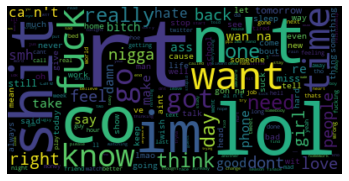

In [43]:
# Start with one review:
tmp = []
text = ""
df = tweets2011.loc[tweets2011['polarity'] == "neg"]
for t in df.nopunc:
    tmp = ''.join(t)
    text = text + ' ' + tmp

print(text[:10])
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

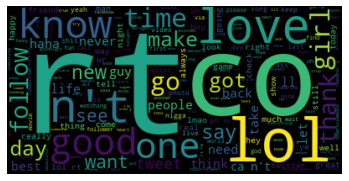

In [44]:
# Start with one review:
tmp = []
text = ""
df = tweets2011.loc[tweets2011['polarity'] == "pos"]
for t in df.nopunc:
    tmp = ''.join(t)
    text = text + ' ' + tmp

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()